In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical Integration

- Midpoint Method
- Trapezoid Method
- Simpson's Method
- Gauss-Legendre Quadrature
- Richardson Extrapolation

Use each of the methods to integrate the function

$$y(x) = \cos(2x)$$

whose definite integral bounded by $x \in [0,\pi/3]$ is given by

$$\int_0^{\pi/3} y(x)dx = \left. \frac{1}{2}\sin(2x) \right\rvert_0^{\pi/3}$$

In [12]:
# integration bounds
a = 0
b = np.pi/3

def y(x):
    return np.cos(2*x)*np.exp(-3*x)

# true integral
int_true = (3/13)*(1+np.exp(-3*np.pi/2))
print(f'True integral: {int_true}')

True integral: 0.23284229792795294


# Midpoint Method

Subdivide the bounded region of $x \in [a,b]$ into $n$ partitions.

$$a = x_0 < x_1 < x_2 < \ldots < x_{n-2} < x_{n-1} < x_n = b$$

The midpoint rule for estimating a definite integral uses a Riemann sum of rectangles with subintervals, typically of equal width. The height of each rectangle corresponds to $f(x)$ evaluated at the midpoints of the $n$ subintervals. The midpoint method can be computed with the formula

$$\boxed{\int_a^b f(x)dx \approx h \sum_{i=0}^{n-1} f\left(\frac{x_i + x_{i+1}}{2}\right)}~, ~~~ \text{where} ~~~ h = \frac{b-a}{n}$$

**Note: This method requires a function and cannot use tabular data.**

## Example

Estimate the following integral using the Midpoint Method with a partition size of $n = 50$.

$$\int_0^{\pi/3} \cos(2x)dx$$

Compute the absolute error of this approximation.

In [13]:
n = 50
a = 0
b = np.pi/3

def midpoint(f,a,b,n):
    # f: function handle
    # [a,b]: integration bounds
    # n: # of partitions

    x = np.linspace(a,b,n+1)
    h = (b-a)/n

    sum = 0
    for i in range(0,n):
        sum += f((x[i] + x[i+1]) / 2) # midpoint method

    result = h*sum
    return result

int_est = midpoint(y,a,b,n)
int_err = abs(int_est - int_true)

print(f'True integral:      {int_true:0.6f}')
print(f'Estimated integral: {int_est:0.6f}')
print(f'Absolute error:     {int_err:0.6e}')
print(f'Step size:          {(b-a)/n:0.6e}')

True integral:      0.232842
Estimated integral: 0.241458
Absolute error:     8.616096e-03
Step size:          2.094395e-02


# Trapezoid Method

Subdivide the bounded region of $x \in [a,b]$ into $n$ partitions.

$$a = x_0 < x_1 < x_2 < \ldots < x_{n-2} < x_{n-1} < x_n = b$$

The Trapezoid Method fits a trapezoid into each subinterval and sums the areas of the trapezoid to approximate the total integral. For each subinterval, the Trapezoid Method computes the area of a trapezoid with corners at $(x_i,0)$, $(x_{i+1},0)$, $(x_i,f(x_i))$, and $(x_{i+1},f(x_{i+1}))$, which is $ h \frac{f(x_i)+f(x_{i+1})}{2}$. The Trapezoid Method approximates integrals according to the expression

$$\boxed{\int_a^b f(x)dx \approx \frac{h}{2} \left[ f(x_0) + 2 \left(\sum_{i=1}^{n-1} f(x_i)\right) + f(x_n) \right]}~, ~~~ \text{where} ~~~ h = \frac{b-a}{n}$$

## Example

Estimate the integral below using the Trapezoidal Method for a range of partitions, $n \in [10,100]$.

$$\int_0^{\pi/3} \cos(2x)dx$$

Plot the estimate versus the number of partitions and the relative error versus the number of partitions.

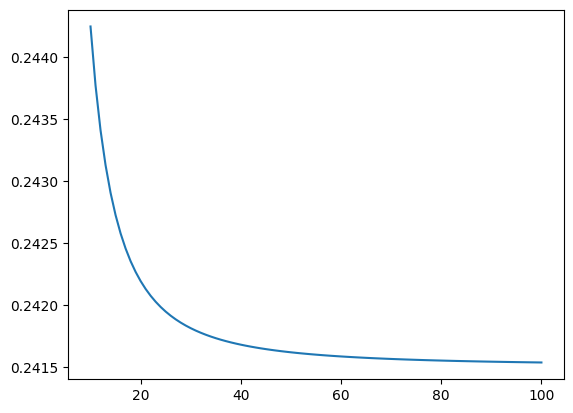

In [14]:
nSpan = np.arange(10,101,1)
a = 0
b = np.pi/3

def trapezoid(f,a,b,n):
    # f: function handle
    # [a,b]: integration bounds
    # n: # of partitions
    x = np.linspace(a,b,n+1)
    h = (b-a)/n

    sum = 0
    for i in range(1,n):
        sum += f(x[i]) # trapezoid method

    result = h/2 * (f(x[0]) + 2*sum + f(x[n]))
    return result

int_est = np.zeros_like(nSpan,dtype=float)
for n in nSpan:
    int_est[n-nSpan[0]] = trapezoid(y,a,b,n)

plt.plot(nSpan,int_est)
plt.show()

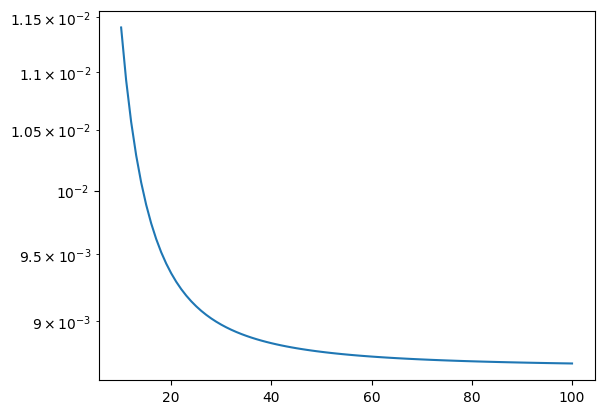

In [15]:
int_err = abs(int_est - int_true)
plt.semilogy(nSpan,int_err)
plt.show()

# Simpson's Method

Consider two consecutive subintervals, $[x_{i−1},x_i]$ and $[x_i,x_{i+1}]$. Simpson’s Method approximates the area under $f(x)$ over these two subintervals by fitting a quadratic polynomial through the points $(x_{i−1},f(_{xi−1}))$, $(x_i,f(x_i))$, and $(x_{i+1},f(x_{i+1}))$, which is a unique polynomial, and then integrating the quadratic exactly to get

$$\int_{x-i}^{x+i}P_i(x) = \frac{h}{3} (f(x_{i-1}) + 4f(x_i) + f(x_{i+1}))$$

Divide the interval $[a,b]$ into $n$ paritions to be integrated. Each partition consists of two subintervals, each of length $h = \frac{b-a}{2n}$. We introduce the points $x_i = a + ih$ for $0 \leq i \leq n$ (notice how $x_0 = a$ and $x_{2n} = b$). To approximate the integral over $[a,b]$, we must sum the integrals of $P_i(x)$ over every two subintervals since $P_i(x)$ spans two subintervals. Substituting $\frac{h}{3} (f(x_{i−1})+4f(x_i)+f(x_{i+1}))$ for the integral of $P_i(x)$ and regrouping the terms for efficiency leads to the formula

$$\boxed{\int_a^b f(x)dx \approx \frac{h}{3} \left[ f(x_0) + 4 \left(\sum_{i=0}^{n-1} f(x_{2i+1})\right) + 2 \left(\sum_{i=1}^{n-1} f(x_{2i})\right) + f(x_{2n}) \right]}~, ~~~ \text{where} ~~~ h = \frac{b-a}{2n}$$

To integrate discrete data points, replace each instance of the continuous function $f(x_k)$ with the discrete value $y_k$.

**Note: To use this method, you must have an even number of subintervals and, therefore, an odd number of data points.**

## Example

Estimate the following integral using the Simpson's Method with a partition size of $n = 50$ (note that this implies there will be 100 subintervals).

$$\int_0^{\pi/3} \cos(2x)dx$$

Compute the absolute error of this approximation.

In [16]:
n = 50
a = 0
b = np.pi/3

def Simpson(f,a,b,n):
    # f: function handle
    # [a,b]: integration bounds
    # n: # of partitions
    x = np.linspace(a,b,2*n+1)
    h = (b-a)/(2*n)

    sum1 = 0
    sum2 = 0
    for i in range(0,n):
        sum1 += f(x[2*i+1])
        if i != 0:
            sum2 += f(x[2*i])

    result = h/3 * (f(x[0]) + 4*sum1 + 2*sum2 + f(x[2*n]))
    return result

int_est = Simpson(y,a,b,n)
int_err = abs(int_est - int_true)

print(f'True integral:      {int_true:0.6f}')
print(f'Estimated integral: {int_est:0.6f}')
print(f'Absolute error:     {int_err:0.6e}')
print(f'Step size:          {(b-a)/(2*n):0.6e}')

True integral:      0.232842
Estimated integral: 0.241513
Absolute error:     8.670746e-03
Step size:          1.047198e-02


# Gauss-Legendre Quadrature

Gauss-Legendre Quadrature assumes the following form:

$$\int_{-1}^1 f(\rho)d\rho \approx \sum_{i=1}^n w_i f(\rho_i)$$

Use a linear transformation to map the original interval of integration, $x \in [a,b]$, onto a new interval $\rho \in [-1,1]$.

$$\frac{\lambda - \sigma_1}{\sigma_2 - \sigma_1} = \frac{\sigma - \lambda_1}{\lambda_2 - \lambda_1}$$

$$\downarrow$$

$$\frac{x - (-1)}{(+1) - (-1)} = \frac{\rho - a}{b - a}$$

$$\Downarrow$$

$$\boxed{\rho = \frac{(x+1)(b-a)}{2} + a ~,~~~ d\rho = \frac{b-a}{2}dx} ~~~~~ \text{and} ~~~~~ \boxed{x = 2 \frac{\rho-a}{b-a} - 1 ~,~~~ dx = \frac{2}{b-a}d\rho}$$

Substituting these results back into the Gauss-Legendre equations, we get

$$\boxed{\int_a^b f(x)dx = \frac{b-a}{2} \int_{-1}^1 f \left( \frac{(x+1)(b-a)}{2} + a \right) d\rho \approx \frac{b-a}{2} \sum_{i=1}^n w_i f\left( \frac{(x+1)(b-a)}{2} + a \right)}$$

where $w_i$ are the weights and $\rho_i$ are the sampling points.

**Note: This method is not appropriate for cases where the function is unknown or for dealing with tabulated data.**

## Example

Estimate the following integral using 2-point and multi-point Gauss-Legendre Quadrature.

$$\int_0^{\pi/3} \cos(2x)dx$$

Compute the absolute error of this approximation.

In [17]:
def GaussQuad2pt(f,a,b):
    w = np.array([1,1]) # weights
    rho = np.array([-1/np.sqrt(3),1/np.sqrt(3)]) # integration/sampling points

    # linear mapping
    x = 0.5*(1-rho)*a + 0.5*(1+rho)*b
    dx = (b-a)/2

    sum_GL = 0
    for i in range(len(rho)):
        sum_GL += w[i]*f(x[i])

    result = sum_GL*dx
    return result

int_est = GaussQuad2pt(y,a,b)
int_err = abs(int_est - int_true)

print(f'True integral:      {int_true:0.6f}')
print(f'Estimated integral: {int_est:0.6f}')
print(f'Absolute error:     {int_err:0.6e}')

True integral:      0.232842
Estimated integral: 0.240039
Absolute error:     7.196720e-03


In [18]:
def GaussQuad(f,a,b,n):
    [rho,w] = np.polynomial.legendre.leggauss(n)

    # linear mapping
    x = 0.5*(1-rho)*a + 0.5*(1+rho)*b
    dx = (b-a)/2

    sum_GL = 0
    for i in range(len(rho)):
        sum_GL += w[i]*f(x[i])

    result = sum_GL*dx
    return result

print(f'True integral:      {int_true:0.6f}\n')

for n in range(3,7):
    int_est = GaussQuad(y,a,b,n)
    int_err = abs(int_est - int_true)

    print(f'{n} points')
    print(f'Estimated integral: {int_est:0.6f}')
    print(f'Absolute error:     {int_err:0.6e}\n')

True integral:      0.232842

3 points
Estimated integral: 0.241789
Absolute error:     8.947160e-03

4 points
Estimated integral: 0.241517
Absolute error:     8.675076e-03

5 points
Estimated integral: 0.241513
Absolute error:     8.670737e-03

6 points
Estimated integral: 0.241513
Absolute error:     8.670746e-03



# Richardson Extrapolation

Refer to slides in class notes.